# Informações

- nomes: Raphael Leite da Costa Nascimento e Adriel Dos Sandos Araujo Cabral
- matrículas: 20190038319 e 20190034839
- Disciplina: Visualização de Dados

# Importações

In [18]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Montando o data frame princial

In [6]:
data_path = 'dados'
files = [os.path.join(data_path, file) for file in os.listdir(data_path)]
files

['dados/datatran2007.csv',
 'dados/datatran2015.csv',
 'dados/datatran2008.csv',
 'dados/datatran2018.csv',
 'dados/datatran2011.csv',
 'dados/datatran2016.csv',
 'dados/datatran2009.csv',
 'dados/datatran2012.csv',
 'dados/datatran2017.csv',
 'dados/datatran2020.csv',
 'dados/datatran2010.csv']

Criando uma lista de data frames e depois unindo todos em um so

In [7]:
dataframes = []

for file in files:
    try:
        dataframes.append(pd.read_csv(file, delimiter=';'))
    except:
        dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))

df_final = pd.concat(dataframes, ignore_index=True)
df_sem_duplicatas = df_final.drop_duplicates(subset='id')

/home/raphael720/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Tratando os valores nulos 

Substituindo os valores nulos da coluna 'ano' pelo ano da coluna 'data_inversa'

In [8]:
def get_ano(year):
    
    regex1 = r'([0-9]+)(-[0-9]+)(-[0-9]+)'
    regex2 = r'([0-9])+/([0-9])+/([0-9]+)'
    
    if '-' in year:
        return int(re.search(regex1, year).group(1))
    else:
        return int('20' + re.search(regex2, year).group(3))

In [9]:
df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'ano'] = df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'data_inversa'].apply(get_ano)

/home/raphael720/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [10]:
df_sem_duplicatas['ano'].unique()

array([2007., 2015., 2008., 2018., 2011., 2016., 2009., 2012., 2017.,
       2020., 2010.])

In [159]:
df_sem_duplicatas[['ano']].isnull().sum()

ano    0
dtype: int64

In [197]:
df_sem_duplicatas.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [161]:
df_sem_duplicatas

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,10.0,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,0,5,0,4,6,NaN,NaN,NaN,NaN,NaN
2,1032898.0,13/08/2007,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,1,2,0,1,1,NaN,NaN,NaN,NaN,NaN
3,1051130.0,12/02/2007,Segunda,02:10:00,MA,135,11.0,SAO LUIS,Animais na Pista,Atropelamento de animal,...,1,0,0,3,1,NaN,NaN,NaN,NaN,NaN
4,1066824.0,20/11/2007,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,0,0,0,1,1,NaN,NaN,NaN,NaN,NaN
5,1069918.0,16/12/2007,Domingo,17:40:00,MA,230,14.0,BARAO DE GRAJAU,Outras,Capotamento,...,1,0,0,1,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784386,347870.0,2020-12-21,segunda,10:45:00,PI,135.0,404,REDENCAO DO GURGUEIA,Falta de Atenção à Condução,Saída de leito carroçável,...,0,1,0,0,1,"-9,43674092","-44,59787172",SR-PI,UOP02,DEL03
1784398,348216.0,2020-11-19,quinta,16:30:00,MA,226.0,429,GRAJAU,Manobra de mudança de faixa,Colisão frontal,...,0,0,0,2,2,"-5,83952584","-46,21364594",SR-MA,UOP02,DEL04
1784410,348821.0,2020-12-10,quinta,19:30:00,PR,277.0,"667,1",MEDIANEIRA,Falta de Atenção à Condução,Tombamento,...,1,1,0,1,2,"-25,26577498","-54,05432901",SR-PR,UOP02,DEL05
1784426,350229.0,2020-10-20,terça,08:00:00,MA,135.0,5,SAO LUIS,Não guardar distância de segurança,Colisão traseira,...,0,4,0,1,4,"-2,62145385","-44,25797421",SR-MA,UOP01,DEL01


In [173]:
df_sem_duplicatas.groupby(['ano']).count().reset_index()

,ano,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,2007.0,127671,127671,127671,127671,127671,127671,127671,127671,127671,...,127671,127671,127671,127671,127671,0,0,0,0,0
1,2008.0,141038,141038,141038,141038,141038,141038,141038,141038,141038,...,141038,141038,141038,141038,141038,0,0,0,0,0
2,2009.0,158646,158646,158646,158646,158646,158646,158646,158646,158646,...,158646,158646,158646,158646,158646,0,0,0,0,0
3,2010.0,183465,183465,183465,183465,183465,183465,183465,183465,183465,...,183465,183465,183465,183465,183465,0,0,0,0,0
4,2011.0,192322,192322,192322,192322,192322,192322,192322,192322,192322,...,192322,192322,192322,192322,192322,0,0,0,0,0
5,2012.0,184561,184561,184561,184561,184561,184561,184561,184561,184561,...,184561,184561,184561,184561,184561,0,0,0,0,0
6,2013.0,186745,186745,186745,186745,186745,186745,186745,186745,186745,...,186745,186745,186745,186745,186745,0,0,0,0,0
7,2014.0,169197,169197,169197,169197,169197,169197,169197,169197,169197,...,169197,169197,169197,169197,169197,0,0,0,0,0
8,2015.0,122158,122158,122158,122158,122158,122158,122158,122158,122158,...,122158,122158,122158,122158,122158,0,0,0,0,0
9,2016.0,96362,96362,96362,96362,96362,96362,96362,96362,96362,...,96362,96362,96362,96362,96362,0,0,0,0,0


# Graficos

In [36]:

plt.style.use('seaborn')
my_blue = '#1e83af'
my_red = '#9c1416'
my_green = '#1a7512'
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [33]:
def grafico_simples(data: pd.core.frame.DataFrame, eixo_x: str, eixo_y: str, title:str) -> None:

    plt.title('Gráfico da queda dos acidentes')
    plt.bar(data[eixo_x], data[eixo_y].values, color=my_blue, label=eixo_y)
    plt.legend(loc="upper right")
    plt.xlabel(eixo_x)
    plt.ylabel(eixo_y)
    plt.xticks(rotation=45)
    plt.show()

## Gráfico da queda dos acidentes 

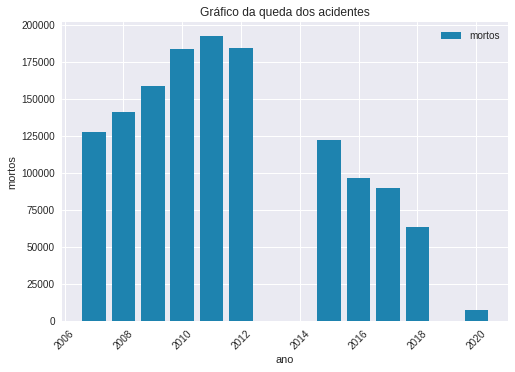

In [35]:
grafico_simples(df_sem_duplicatas.groupby(['ano']).count().reset_index(), 'ano', 'mortos', 
                'Gráfico da queda dos acidentes')

## Gráfico de causas de acidente 2011

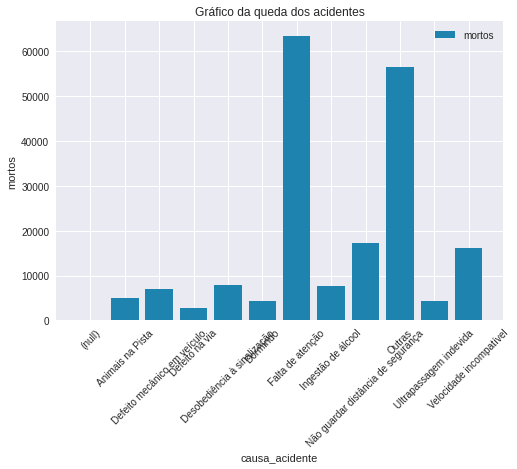

In [34]:
df_graph = df_sem_duplicatas.loc[df_sem_duplicatas['ano'] == 2011].groupby('causa_acidente')['mortos'].count().reset_index()
grafico_simples(df_graph, 'causa_acidente', 'mortos', 'Gráfico de causas de acidente 2011')

In [193]:
df_sem_duplicatas.groupby('uf')['id'].count().reset_index()

,uf,id
0,(null),12
1,AC,4780
2,AL,19645
3,AM,2223
4,AP,2423
5,BA,94821
6,CE,35752
7,DF,14729
8,ES,72600
9,GO,77081


### Número de acidentes por UF

<AxesSubplot:xlabel='uf', ylabel='id'>

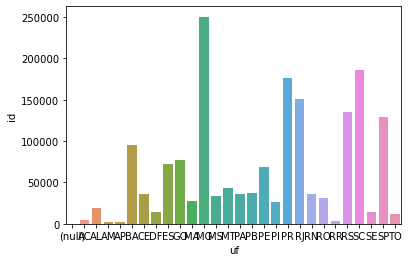

In [194]:
sns.barplot(data=df_sem_duplicatas.groupby('uf')['id'].count().reset_index(), 
            x='uf', 
            y='id', orient='v')

## Gráficos da Paraiba

In [37]:
df_sem_duplicatas_PB = df_sem_duplicatas.loc[df_sem_duplicatas['uf'] == 'PB'].reset_index(drop=True)

In [38]:
df_sem_duplicatas_PB['municipio'] = df_sem_duplicatas_PB['municipio'].map(lambda nome: nome.strip())

In [39]:

df_mortos = df_sem_duplicatas_PB.groupby(['ano'])['mortos'].sum().reset_index()
df_feridos = df_sem_duplicatas_PB.groupby(['ano'])['feridos'].sum().reset_index()
df_ilesos = df_sem_duplicatas_PB.groupby(['ano'])['ilesos'].sum().reset_index()


anos = df_mortos['ano'].values
anos = [str(ano) for ano in anos]

### Número de mortos, feridos e ilesos a cada ano na Paraíba

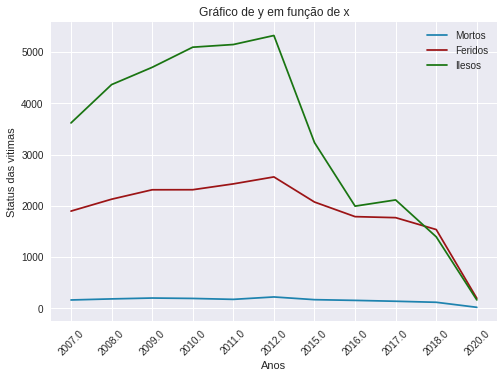

In [40]:
plt.title('Gráfico de y em função de x')
plt.plot(anos, df_mortos['mortos'].values, '-', color=my_blue, label="Mortos")
plt.plot(anos, df_feridos['feridos'].values, '-', color=my_red, label="Feridos")
plt.plot(anos, df_ilesos['ilesos'].values, '-', color=my_green, label="Ilesos")
plt.legend(loc="upper right")
plt.xlabel('Anos')
plt.ylabel('Status das vitimas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()